In [1]:
#imports 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
%matplotlib inline  

In [3]:
#importing train dataset
data_train = pd.read_csv('Google_Stock_Price_Train.csv')
train_set = data_train.iloc[:,1:2].values

#importing test dataset
data_test = pd.read_csv('Google_Stock_Price_Test.csv')
test_set = data_test.iloc[:,1:2].values

In [4]:
#scaling the training data
sc = MinMaxScaler(feature_range=(0,1))
scaled_train_set = sc.fit_transform(train_set)

In [5]:
#splitting into x and y np arrays
X_train = [] 
Y_train = []

for i in range (60,1258):
    X_train.append(scaled_train_set[i-60:i,0])
    Y_train.append(scaled_train_set[i,0])

X_train = np.array(X_train)
Y_train = np.array(Y_train)

#reshaping the training input to match the RNN input format
X_train = np.reshape(X_train,(X_train.shape[0],X_train.shape[1],1))

In [6]:
#rnn model
rnn = keras.Sequential()

rnn.add(layers.LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1],1)))
rnn.add(layers.Dropout(0.2))

rnn.add(layers.LSTM(units=50, return_sequences=True))
rnn.add(layers.Dropout(0.2))

rnn.add(layers.LSTM(units=50, return_sequences=True))
rnn.add(layers.Dropout(0.2))

rnn.add(layers.LSTM(units=50))
rnn.add(layers.Dropout(0.2))

rnn.add(layers.Dense(units=1))

rnn.compile(optimizer='adam',loss='mean_squared_error')

rnn.fit(X_train, Y_train, epochs=100, batch_size=32)

Train on 1198 samples
Epoch 1/100
1198/1198 [==============================] - 10s 8ms/sample - loss: 0.0486
Epoch 2/100
1198/1198 [==============================] - 1s 502us/sample - loss: 0.0060
Epoch 3/100
1198/1198 [==============================] - 1s 510us/sample - loss: 0.0055
Epoch 4/100
1198/1198 [==============================] - 1s 568us/sample - loss: 0.0053
Epoch 5/100
1198/1198 [==============================] - 1s 533us/sample - loss: 0.0052
Epoch 6/100
1198/1198 [==============================] - 1s 511us/sample - loss: 0.0049
Epoch 7/100
1198/1198 [==============================] - 1s 531us/sample - loss: 0.0054
Epoch 8/100
1198/1198 [==============================] - 1s 508us/sample - loss: 0.0047
Epoch 9/100
1198/1198 [==============================] - 1s 493us/sample - loss: 0.0046
Epoch 10/100
1198/1198 [==============================] - 1s 520us/sample - loss: 0.0045
Epoch 11/100
1198/1198 [==============================] - 1s 502us/sample - loss: 0.0050
Epoch 12/

1198/1198 [==============================] - 1s 474us/sample - loss: 0.0016
Epoch 93/100
1198/1198 [==============================] - 1s 460us/sample - loss: 0.0017
Epoch 94/100
1198/1198 [==============================] - 1s 465us/sample - loss: 0.0016
Epoch 95/100
1198/1198 [==============================] - 1s 467us/sample - loss: 0.0015
Epoch 96/100
1198/1198 [==============================] - 1s 474us/sample - loss: 0.0015
Epoch 97/100
1198/1198 [==============================] - 1s 480us/sample - loss: 0.0015s - loss: 
Epoch 98/100
1198/1198 [==============================] - 1s 464us/sample - loss: 0.0016
Epoch 99/100
1198/1198 [==============================] - 1s 468us/sample - loss: 0.0015
Epoch 100/100
1198/1198 [==============================] - 1s 452us/sample - loss: 0.0015


In [7]:
#creating inputs for prediction
data_combined = pd.concat((data_train['Open'],data_test['Open']),axis=0)
predict_inputs = data_combined[len(data_combined)-len(data_test)-60:].values
predict_inputs = predict_inputs.reshape(-1,1)
predict_inputs = sc.transform(predict_inputs)

X_test = []

for i in range (60,80):
    X_test.append(predict_inputs[i-60:i,0])

X_test = np.array(X_test)
X_test = np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))

In [8]:
#prediction
predict_outputs = rnn.predict(X_test)

#inverse the scale for predicted outputs
predict_outputs = sc.inverse_transform(predict_outputs)

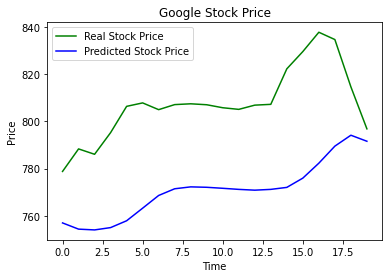

In [9]:
#plotting test vs predictions
plt.plot(test_set,color='green',label='Real Stock Price')
plt.plot(predict_outputs,color='blue',label='Predicted Stock Price')
plt.title('Google Stock Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()